<a href="https://colab.research.google.com/github/Rodrigo-Rezende/Data-Augmentation-in-the-Sarcasm-and-Irony-Detection-Task-in-the-Portuguese-Language/blob/main/IronyDetection_tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install data_augmentation_GASPLN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
  Created wheel for data_augmentation_GASPLN: filename=data_augmentation_GASPLN-0.2.3-py3-none-any.whl size=6026749 sha256=3fc91a25fbc88f07747b25897e94bdc6d9216e84761a56ff00c8036033b34d95
  Stored in directory: /root/.cache/pip/wheels/4e/da/71/fcb476816b9d6a4886d36436be474d0f7184720dd947efa59e
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-n

In [ ]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 19.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Imports

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
import string
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from data_augmentation_GASPLN import text_augmentation
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

nltk.download('stopwords')
nltk.download('rslp')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
reduced_path='/content/drive/MyDrive/Datasets_tcc/training_news _teste.csv'

test_path='/content/drive/MyDrive/Datasets_tcc/test_news_com_rotulo.csv'

fullsize_not_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_100.csv'
fullsize_syn_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_100_syn_augmented.csv'
fullsize_bt_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_100_bt_augmented.csv'
fullsize_syn_bt_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_100_bt_syn_augmented.csv'
fullsize_bt_syn_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_100_syn_bt_augmented.csv'

halfsize_not_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_50.csv'
halfsize_syn_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_50_syn_augmented.csv'
halfsize_bt_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_50_bt_augmented.csv'
halfsize_syn_bt_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_50_bt_syn_augmented.csv'
halfsize_bt_syn_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_50_syn_bt_augmented.csv'

onefourth_not_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_25.csv'
onefourth_syn_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_25_syn_augmented.csv'
onefourth_bt_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_25_bt_augmented.csv'
onefourth_syn_bt_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_25_bt_syn_augmented.csv'
onefourth_bt_syn_augmented_path='/content/drive/MyDrive/Datasets_tcc/training_news_25_syn_bt_augmented.csv'

dataset = pd.read_csv(reduced_path, sep='\t')

# Aplica Data Augmentation ao dataset e o salva em um novo .csv

In [ ]:
dataset = pd.read_csv(not_augmented_path, sep='\t')
def process_dataset_and_augment_text(dataset):
    # Lista para armazenar os textos aumentados formatados
    augmented_texts = []

    # Itera sobre as linhas do dataframe
    for index, row in dataset.iterrows():
        text = row['text']

        # Chame a função de augmentação de texto com os parâmetros desejados para cada string
        augmented_text = text_augmentation(text,
                                           use_synonyms=True, synonyms_percentage=0.35,
                                           use_back_translation=False, languages=['en', 'es'], translator='google',
                                           use_character_swap=False, char_swap_prob=0.3,
                                           use_random_swap=False, num_words=2, random_swap_prob=0.2,
                                           use_add_noise=False, word_noise_prob=0.3, char_noise_prob=0.3)

        # Adiciona os textos originais, aumentados e as previsões à lista
        augmented_texts.append({'text': text, 'augmented_text': augmented_text, 'prediction': row['prediction']})

    # Cria um novo DataFrame com os resultados
    result_df = pd.DataFrame(augmented_texts)

    # Converte o DataFrame para uma string CSV
    result_csv = result_df.to_csv("/content/drive/MyDrive/Datasets_tcc/teste_saida.csv",index=False, sep='\t', quoting=1, doublequote=True, escapechar='\\')

    return result_csv

# Chamada da função e obtenção da string CSV formatada
result = process_dataset_and_augment_text(dataset)

# Print do resultado
print(result)

⬇ trata "too many requests" da api de tradução do google ⬇

In [ ]:
dataset = pd.read_csv(not_augmented_path, sep='\t')
def process_dataset_and_augment_text(dataset):
    # Lista para armazenar os textos aumentados formatados
    augmented_texts = []

    # Total de linhas no dataset
    total_lines = len(dataset)

    # Itera sobre as linhas do dataframe
    for index, row in dataset.iterrows():
        # Obtém a string da coluna 'preprocessed_news'
        text = row['text']

        # Divide o texto em chunks de no máximo 5000 caracteres
        chunks = [text[i:i+5000] for i in range(0, len(text), 5000)]

        # Inicializa a variável para armazenar o texto aumentado
        augmented_text = ""

        # Itera sobre os chunks do texto
        for chunk in chunks:
            try:
                # Chama a função de aumentação de texto com os parâmetros desejados para cada chunk
                augmented_chunk = text_augmentation(chunk,
                                                    use_synonyms=False, synonyms_percentage=0.35,
                                                    use_back_translation=True, languages=['en', 'es'], translator='google',
                                                    use_character_swap=False, char_swap_prob=0.3,
                                                    use_random_swap=False, num_words=2, random_swap_prob=0.2,
                                                    use_add_noise=False, word_noise_prob=0.3, char_noise_prob=0.3)
                augmented_text += augmented_chunk
            except Exception as e:
                # Em caso de erro na tradução, mantém o chunk original
                augmented_text += chunk
                print(f"Error processing chunk {index + 1}/{total_lines}: {e}")

            # Adiciona um atraso aleatório de 1 a 3 segundos entre cada tradução
            time.sleep(random.uniform(1, 3))

        # Printa o índice atual em relação ao total de linhas
        print(f"Processing {index + 1}/{total_lines}")

        # Adiciona os textos originais, aumentados e as previsões à lista
        augmented_texts.append({'text': text, 'augmented_text': augmented_text, 'prediction': row['prediction']})

    # Cria um novo DataFrame com os resultados
    result_df = pd.DataFrame(augmented_texts)

    # Converte o DataFrame para uma string CSV
    result_csv = result_df.to_csv("E:\\UFPEL\\TCC\\Dataset\\training_news_bt_augmented.csv", index=False, sep='\t', quoting=1, doublequote=True, escapechar='\\')

    return result_csv

# Aplicar aumentação de dados
augmented_data = process_dataset_and_augment_text(dataset)

# Treinamento com augmentação

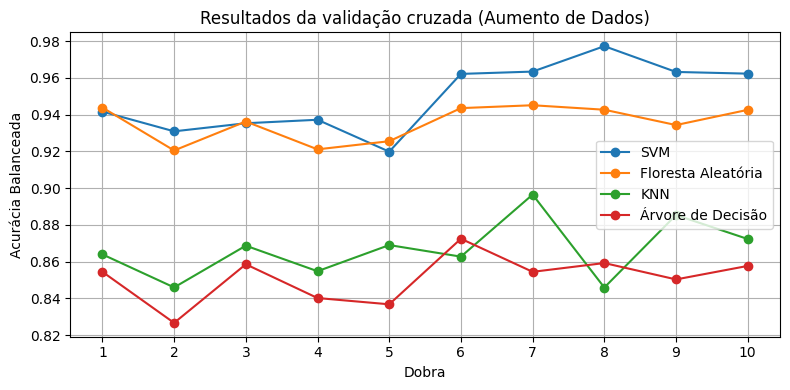

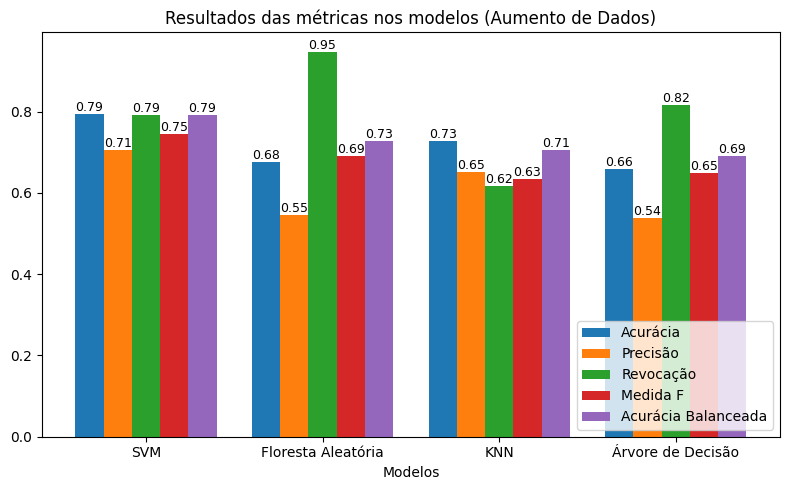

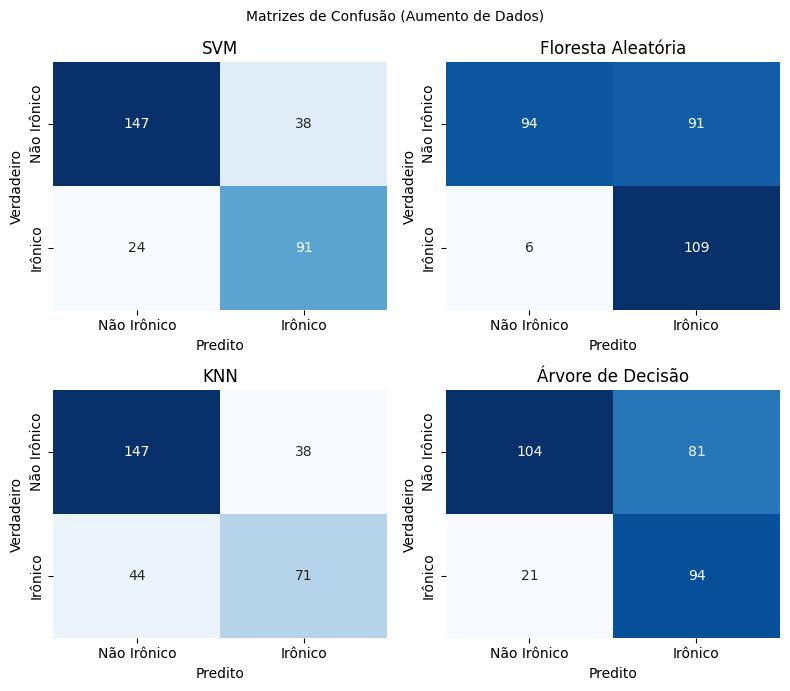

In [ ]:
augmented_data = pd.read_csv(onefourth_syn_bt_augmented_path, sep='\t')


def preprocess_text(text):
    # Converte para minúsculas
    text = text.lower()
    # Remove pontuações
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenização
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('portuguese')]
    return ' '.join(tokens)

# Pré-processamento
augmented_data['augmented_text'] = augmented_data['augmented_text'].apply(preprocess_text)

# Divisão dos dados 80/20
X_augmented_train, X_augmented_val, y_augmented_train, y_augmented_val = train_test_split(
    augmented_data['augmented_text'], augmented_data['prediction'], test_size=0.2, random_state=42
)

# Vetorização
tfidf_vectorizer = TfidfVectorizer()
X_augmented_train_tfidf = tfidf_vectorizer.fit_transform(X_augmented_train.astype('U'))
X_augmented_val_tfidf = tfidf_vectorizer.transform(X_augmented_val.astype('U'))

# Inicializar os modelos SVM, RANDOM FOREST, KNN, DECISION TREE
svm_model_augmented = SVC(class_weight="balanced")
rf_model_augmented = RandomForestClassifier(class_weight="balanced")
knn_model_augmented = KNeighborsClassifier()
dt_model_augmented = DecisionTreeClassifier(class_weight="balanced")


# Lista de modelos
models = [svm_model_augmented, rf_model_augmented, knn_model_augmented, dt_model_augmented]
model_names = ['SVM', 'Floresta Aleatória', 'KNN', 'Árvore de Decisão']

# Lista das pontuações de validação cruzada
cv_balanced_accuracy_scores = []

# Avaliação cross_validate
for model in models:
    balanced_accuracy_scores = cross_val_score(model, X_augmented_train_tfidf, y_augmented_train, cv=10, scoring='balanced_accuracy')
    cv_balanced_accuracy_scores.append(balanced_accuracy_scores)

# Plot dos resultados
plt.figure(figsize=(8, 4))

# Plot Balanced Accuracy
plt.plot(range(1, 11), cv_balanced_accuracy_scores[0], marker='o', label=model_names[0])
plt.plot(range(1, 11), cv_balanced_accuracy_scores[1], marker='o', label=model_names[1])
plt.plot(range(1, 11), cv_balanced_accuracy_scores[2], marker='o', label=model_names[2])
plt.plot(range(1, 11), cv_balanced_accuracy_scores[3], marker='o', label=model_names[3])


plt.title('Resultados da validação cruzada (Aumento de Dados)')
plt.xlabel('Dobra')
plt.ylabel('Acurácia Balanceada')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Leitura do Conjunto de Dados de Teste
test_data = pd.read_csv(test_path, sep='\t')

# Pré-processamento do Conjunto de Dados de Teste
X_test_preprocessed = test_data['text'].apply(preprocess_text)

# Vetorização do Conjunto de Dados de Teste
X_test_tfidf = tfidf_vectorizer.transform(X_test_preprocessed.astype('U'))


y_test=test_data['label']
# Treinamento dos Modelos nos Dados de Treino Completo
for model in models:
    model.fit(X_augmented_train_tfidf, y_augmented_train)

# Avaliação nos Dados de Teste
results = {}
for i, model in enumerate(models):
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    results[model_names[i]] = {
        'Acurácia': accuracy,
        'Precisão': precision,
        'Revocação': recall,
        'Medida F': f1,
        'Acurácia Balanceada': balanced_accuracy
    }

# Avaliação nos Dados de Teste
confusion_matrices = {}
for i, model in enumerate(models):
    y_pred = model.predict(X_test_tfidf)
    model_name = model_names[i]

    #  Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm


# Extrai métricas do relatório de classificação
metrics = ['Acurácia', 'Precisão', 'Revocação', 'Medida F', 'Acurácia Balanceada']
model_names = list(results.keys())
values = np.array([[results[model][metric] for metric in metrics] for model in model_names])

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.16
index = np.arange(len(model_names))

# Plotagem das barras para cada métrica
for i, metric in enumerate(metrics):
    bars = ax.bar(index + i * bar_width, values[:, i], bar_width, label=metric)

    # Adiciona os valores acima das barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', color='black', fontsize=9)

# Configuração do eixo x
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(model_names)
ax.set_xlabel('Modelos')
ax.legend()

# Exibe o gráfico
plt.title('Resultados das métricas nos modelos (Aumento de Dados)')
plt.legend(fontsize='medium', loc='lower right')
plt.tight_layout()
plt.show()

# Adiciona a plotagem da matriz de confusão
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))
fig.suptitle('Matrizes de Confusão (Aumento de Dados)', fontsize=10)

for i, (model_name, ax) in enumerate(zip(model_names, axes.flatten())):
    cm = confusion_matrices[model_name]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, xticklabels=['Não Irônico', 'Irônico'], yticklabels=['Não Irônico', 'Irônico'])
    ax.set_title(model_name)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Verdadeiro')

plt.tight_layout()
plt.show()


# Treinamento sem augmentação

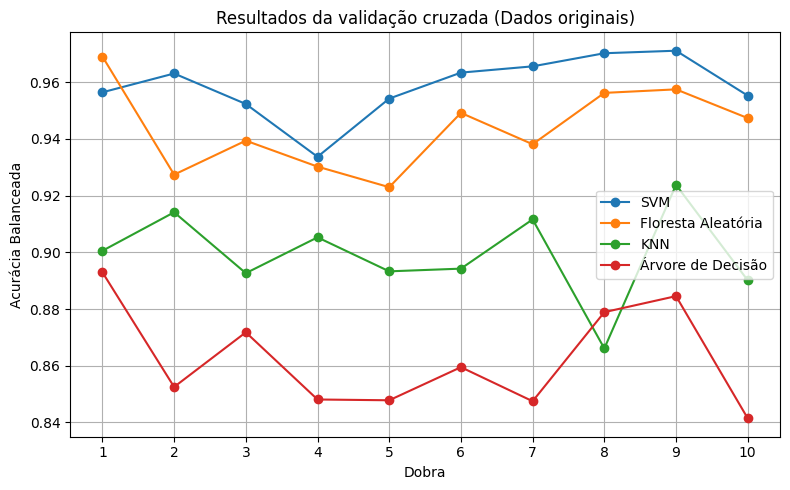

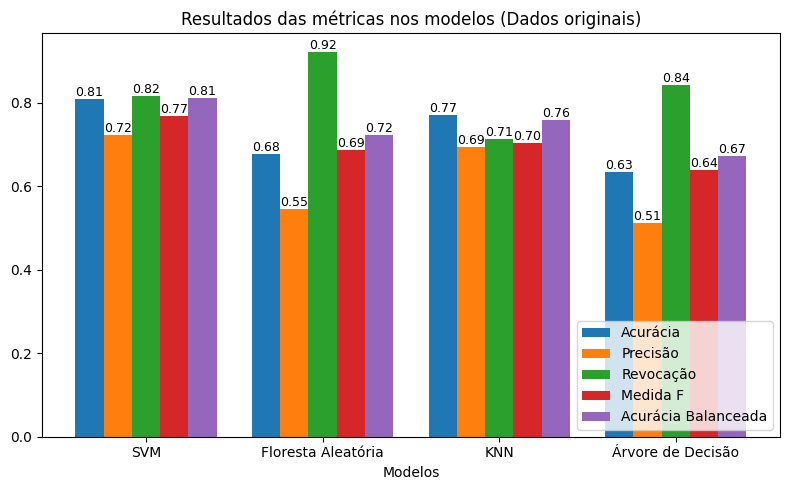

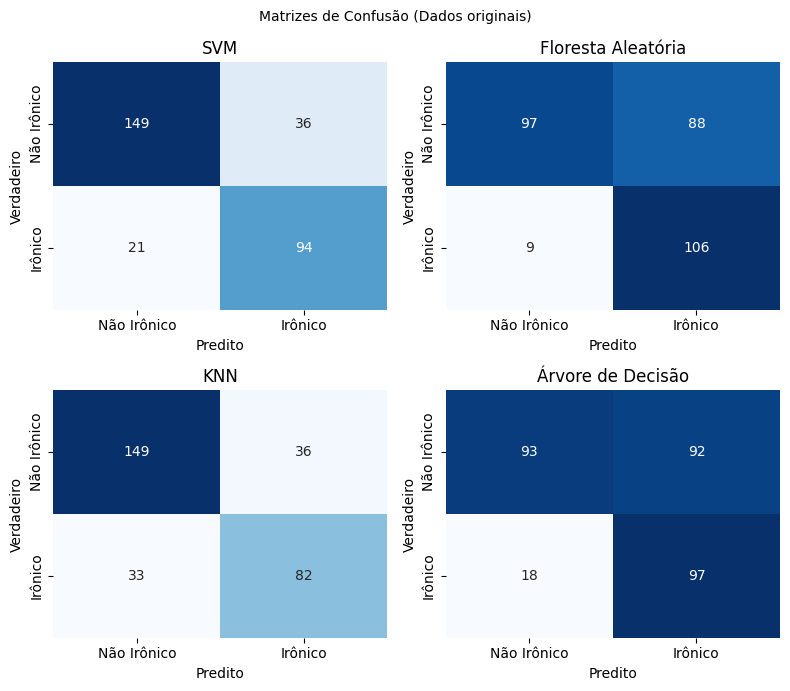

In [ ]:

augmented_data = pd.read_csv(onefourth_not_augmented_path, sep='\t')

# Função de pré-processamento
def preprocess_text(text):
    # Converte para minúsculas
    text = text.lower()
    # Remove pontuações
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenização
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('portuguese')]
    return ' '.join(tokens)

# Pré-processamento
augmented_data['text'] = augmented_data['text'].apply(preprocess_text)

# Divisão dos dados 80/20
X_augmented_train, X_augmented_val, y_augmented_train, y_augmented_val = train_test_split(
    augmented_data['text'], augmented_data['prediction'], test_size=0.2, random_state=42
)

# Vetorização
tfidf_vectorizer = TfidfVectorizer()
X_augmented_train_tfidf = tfidf_vectorizer.fit_transform(X_augmented_train.astype('U'))
X_augmented_val_tfidf = tfidf_vectorizer.transform(X_augmented_val.astype('U'))

# Inicializar os modelos SVM, RANDOM FOREST, KNN, DECISION TREE
svm_model_augmented = SVC(class_weight="balanced")
rf_model_augmented = RandomForestClassifier(class_weight="balanced")
knn_model_augmented = KNeighborsClassifier()
dt_model_augmented = DecisionTreeClassifier(class_weight="balanced")


# Lista de modelos
models = [svm_model_augmented, rf_model_augmented, knn_model_augmented, dt_model_augmented]
model_names = ['SVM', 'Floresta Aleatória', 'KNN', 'Árvore de Decisão']

# Lista para armazenar as pontuações de validação cruzada
cv_balanced_accuracy_scores = []

# Avaliação dos modelos com cross_validate
for model in models:
    balanced_accuracy_scores = cross_val_score(model, X_augmented_train_tfidf, y_augmented_train, cv=10, scoring='balanced_accuracy')
    cv_balanced_accuracy_scores.append(balanced_accuracy_scores)

# Plotando os resultados
plt.figure(figsize=(8, 5))

# Plot Balanced Accuracy
plt.plot(range(1, 11), cv_balanced_accuracy_scores[0], marker='o', label=model_names[0])
plt.plot(range(1, 11), cv_balanced_accuracy_scores[1], marker='o', label=model_names[1])
plt.plot(range(1, 11), cv_balanced_accuracy_scores[2], marker='o', label=model_names[2])
plt.plot(range(1, 11), cv_balanced_accuracy_scores[3], marker='o', label=model_names[3])


plt.title('Resultados da validação cruzada (Dados originais)')
plt.xlabel('Dobra')
plt.ylabel('Acurácia Balanceada')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Leitura do Conjunto de Dados de Teste
test_data = pd.read_csv(test_path, sep='\t')

# Pré-processamento do Conjunto de Dados de Teste
X_test_preprocessed = test_data['text'].apply(preprocess_text)

# Vetorização do Conjunto de Dados de Teste
X_test_tfidf = tfidf_vectorizer.transform(X_test_preprocessed.astype('U'))


y_test=test_data['label']
# Treinamento dos Modelos nos Dados de Treino Completo
for model in models:
    model.fit(X_augmented_train_tfidf, y_augmented_train)

# Avaliação nos Dados de Teste
results = {}
for i, model in enumerate(models):
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    results[model_names[i]] = {
        'Acurácia': accuracy,
        'Precisão': precision,
        'Revocação': recall,
        'Medida F': f1,
        'Acurácia Balanceada': balanced_accuracy
    }
# Avaliação nos Dados de Teste
confusion_matrices = {}
for i, model in enumerate(models):
    y_pred = model.predict(X_test_tfidf)
    model_name = model_names[i]

    # Calcula a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm



# Extrai métricas do relatório de classificação
metrics = ['Acurácia', 'Precisão', 'Revocação', 'Medida F', 'Acurácia Balanceada']
model_names = list(results.keys())
values = np.array([[results[model][metric] for metric in metrics] for model in model_names])

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.16
index = np.arange(len(model_names))

# Plotagem das barras para cada métrica
for i, metric in enumerate(metrics):
    bars = ax.bar(index + i * bar_width, values[:, i], bar_width, label=metric)

    # Adiciona os valores acima das barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', color='black', fontsize=9)

# Configuração do eixo x
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(model_names)
ax.set_xlabel('Modelos')
ax.legend()

# Exibe o gráfico
plt.title('Resultados das métricas nos modelos (Dados originais)')
plt.legend(fontsize='medium', loc='lower right')
plt.tight_layout()
plt.show()

# Adiciona a plotagem da matriz de confusão
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))
fig.suptitle('Matrizes de Confusão (Dados originais)', fontsize=10)

for i, (model_name, ax) in enumerate(zip(model_names, axes.flatten())):
    cm = confusion_matrices[model_name]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, xticklabels=['Não Irônico', 'Irônico'], yticklabels=['Não Irônico', 'Irônico'])
    ax.set_title(model_name)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Verdadeiro')

plt.tight_layout()
plt.show()




# Detalhamento do dataset

Entradas irônicas:1811
Entradas não irônicas:2812
Porcentagem de irônicas:39.17369673372269 %
Porcentagem de não irônicas:60.82630326627731 %


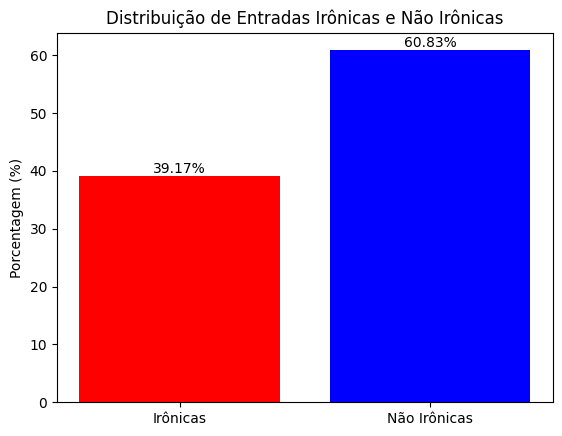

In [ ]:
dataset = pd.read_csv(onefourth_not_augmented_path, sep='\t')

def process_dataset(dataset):
    ironic=0
    non_ironic=0

    for index, row in dataset.iterrows():
        label = row['prediction']
        if label == 1:
          ironic+=1
        if label == 0:
          non_ironic+=1

    print(f"Entradas irônicas:{ironic}")
    print(f"Entradas não irônicas:{non_ironic}")
    porcentagem_ironic = (ironic / (non_ironic+ironic)) * 100
    print(f"Porcentagem de irônicas:{porcentagem_ironic} %")
    porcentagem_non_ironic = (non_ironic / (non_ironic+ironic)) * 100
    print(f"Porcentagem de não irônicas:{porcentagem_non_ironic} %")
    plotar_grafico(porcentagem_ironic, porcentagem_non_ironic)

def plotar_grafico(porcentagem_ironic, porcentagem_non_ironic):
    categorias = ['Irônicas', 'Não Irônicas']
    porcentagens = [porcentagem_ironic, porcentagem_non_ironic]

    fig, ax = plt.subplots()
    bars = ax.bar(categorias, porcentagens, color=['red', 'blue'])

    for bar, porcentagem in zip(bars, porcentagens):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{porcentagem:.2f}%',
                ha='center', va='bottom')

    plt.title('Distribuição de Entradas Irônicas e Não Irônicas')
    plt.ylabel('Porcentagem (%)')
    plt.show()

process_dataset(dataset)
